# Explore here

In [2]:
# Your code here

# Importar librerías básicas
import pandas as pd

# Cargar el dataset desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Ver info general del DataFrame
df.info()

# Variables categóricas
cat_vars = df.select_dtypes(include='object').columns.tolist()
print("Variables categóricas:", cat_vars)

# Variables numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables numéricas:", num_vars)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Variables categóricas: ['sex', 'smoker', 'region']
Variables numéricas: ['age', 'bmi', 'children', 'charges']


/tmp/ipykernel_3303/2688297839.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


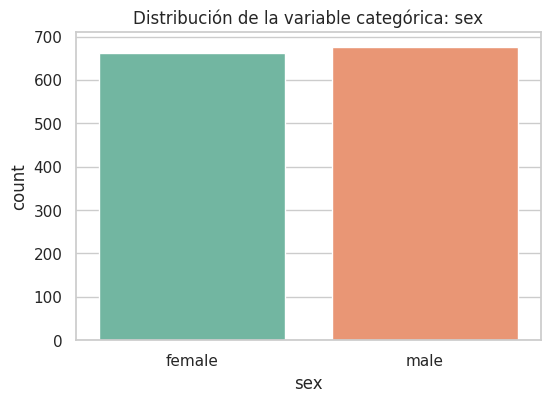

/tmp/ipykernel_3303/2688297839.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


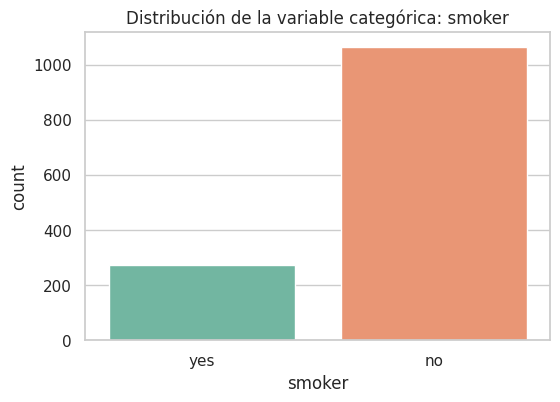

/tmp/ipykernel_3303/2688297839.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


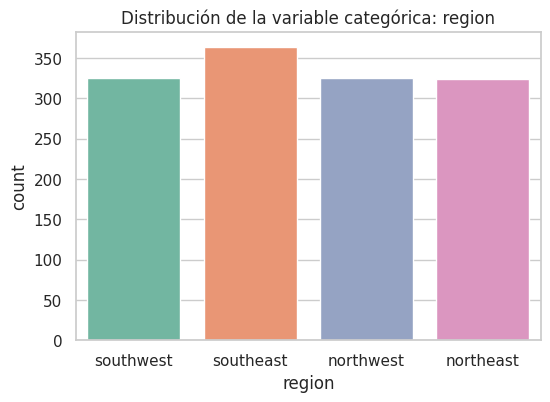

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear un gráfico de barras para cada variable categórica
for col in cat_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.show()


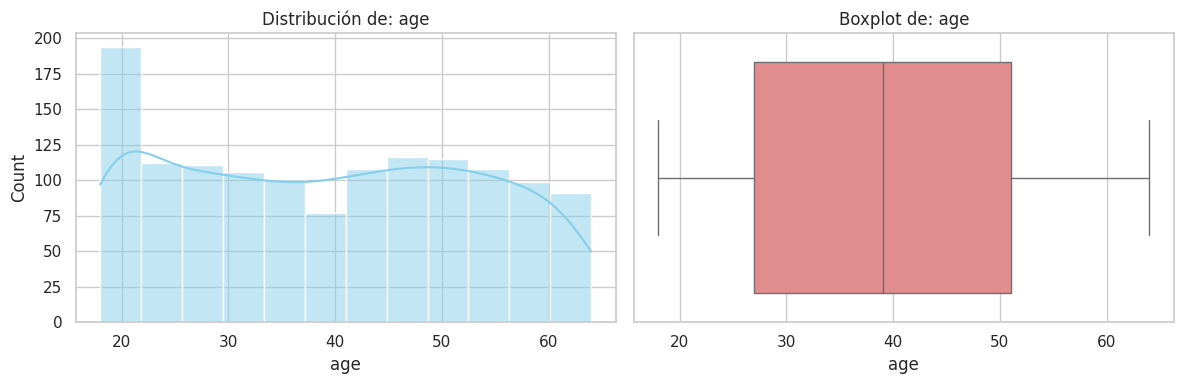

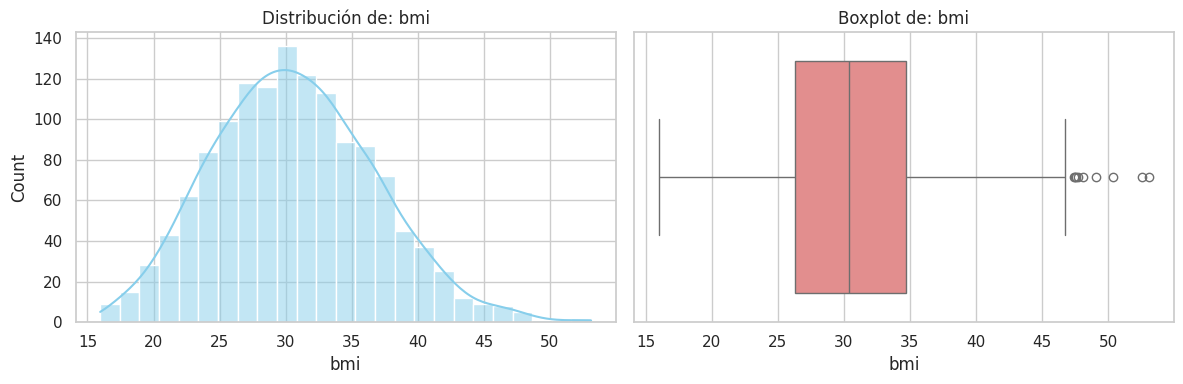

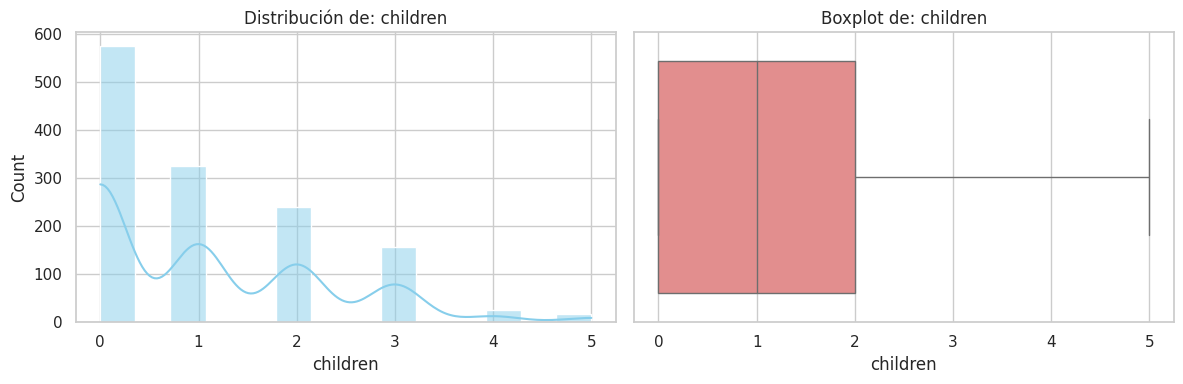

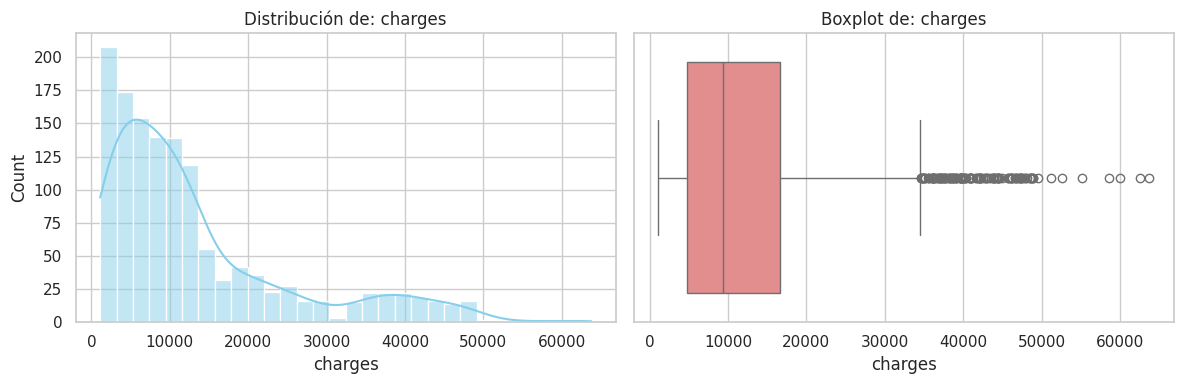

In [6]:
# Histograma + Boxplot para cada variable numérica
for col in num_vars:
    plt.figure(figsize=(12,4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribución de: {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f'Boxplot de: {col}')

    plt.tight_layout()
    plt.show()


In [7]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Outliers eliminados en {column}: {(df[column] < lower_bound).sum() + (df[column] > upper_bound).sum()}")
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar para bmi y charges
df = remove_outliers_iqr(df, 'bmi')
df = remove_outliers_iqr(df, 'charges')


Outliers eliminados en bmi: 9
Outliers eliminados en charges: 138


/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


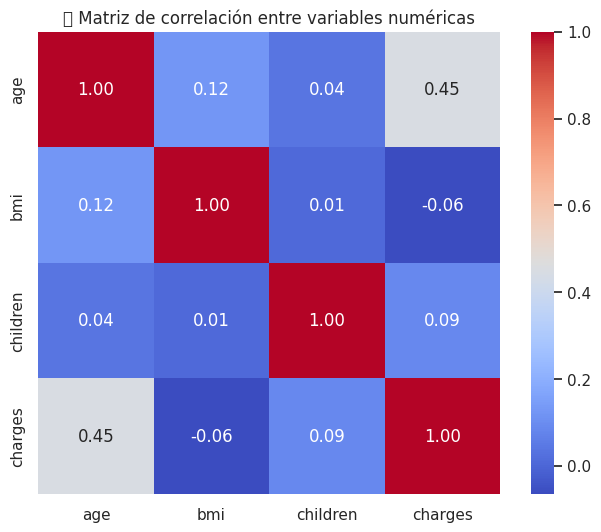

In [8]:
# Calcular la matriz de correlación (solo variables numéricas)
corr_matrix = df[num_vars].corr()

# Mostrar la matriz con un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("🔍 Matriz de correlación entre variables numéricas")
plt.show()


| Variable   | Correlación con `charges` | Comentario                                                              |
| ---------- | ------------------------- | ----------------------------------------------------------------------- |
| `age`      | **0.45**                  | Moderada correlación positiva. Mayor edad → mayor coste.                |
| `bmi`      | -0.06                     | Casi nula. Podría ser útil con interacción (por ejemplo, con `smoker`). |
| `children` | 0.09                      | Débil. Puede tener un pequeño impacto.                                  |


/tmp/ipykernel_3303/544555487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges', palette='Set3')


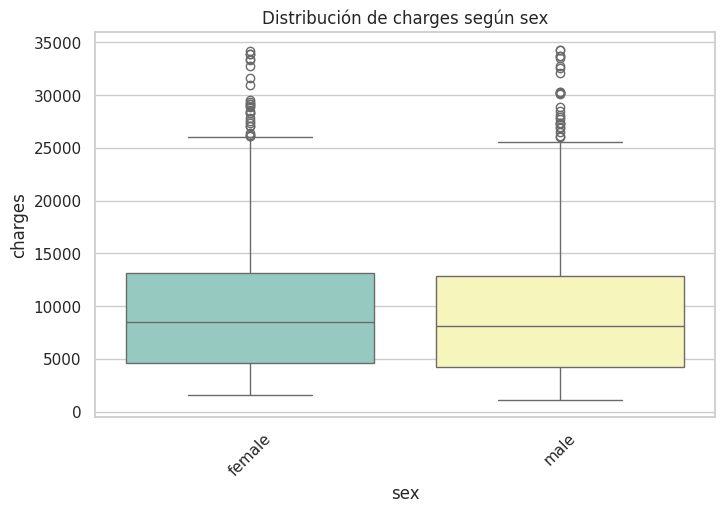

/tmp/ipykernel_3303/544555487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges', palette='Set3')


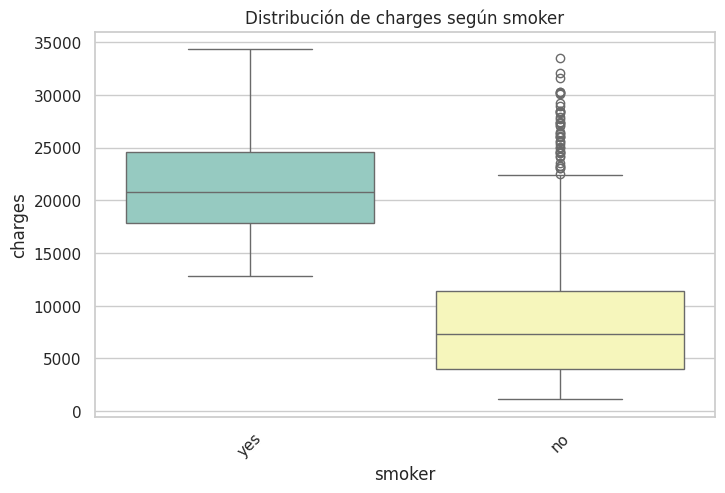

/tmp/ipykernel_3303/544555487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='charges', palette='Set3')


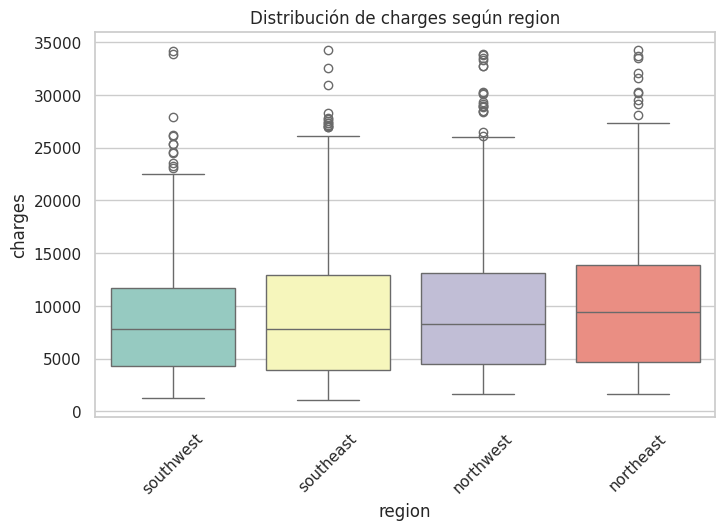

In [9]:
# Boxplots para comparar el coste del seguro según cada categoría
for col in cat_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=col, y='charges', palette='Set3')
    plt.title(f'Distribución de charges según {col}')
    plt.xticks(rotation=45)
    plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# 1. One-hot encoding para variables categóricas
df_encoded = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# 2. Separar variables predictoras y variable objetivo
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 3. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar dimensiones
print("Dimensiones del set de entrenamiento:", X_train.shape)
print("Dimensiones del set de prueba:", X_test.shape)


Dimensiones del set de entrenamiento: (952, 8)
Dimensiones del set de prueba: (239, 8)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Inicializar y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Realizar predicciones
y_pred = model.predict(X_test)

# 3. Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluación del modelo:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")


📊 Evaluación del modelo:
MAE  = 2620.93
RMSE = 4458.44
R²   = 0.63


| Métrica             | Valor       | Interpretación                                                                                                   |
| ------------------- | ----------- | ---------------------------------------------------------------------------------------------------------------- |
| **MAE**             | 2620.93 USD | En promedio, el modelo se equivoca unos \$2,620 en la predicción del coste.                                      |
| **RMSE**            | 4458.44 USD | Penaliza más los errores grandes. Bastante elevado → posible presencia de outliers o relaciones no lineales.     |
| **R² (R cuadrado)** | **0.63**    | El modelo explica el 63% de la variabilidad en los costes de seguro. Para un modelo lineal inicial, no está mal. |


In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Definir grids para alpha (hiperparámetro de regularización)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

# Lasso
lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

# Resultados de los mejores modelos
print("🔧 Ridge - Mejor alpha:", grid_ridge.best_params_['alpha'])
print("🔧 Lasso - Mejor alpha:", grid_lasso.best_params_['alpha'])

# Evaluar ambos en test
ridge_pred = grid_ridge.best_estimator_.predict(X_test)
lasso_pred = grid_lasso.best_estimator_.predict(X_test)

# Métricas
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(f"🏁 Ridge RMSE = {ridge_rmse:.2f}")
print(f"🏁 Lasso RMSE = {lasso_rmse:.2f}")


🔧 Ridge - Mejor alpha: 1
🔧 Lasso - Mejor alpha: 10
🏁 Ridge RMSE = 4450.56
🏁 Lasso RMSE = 4457.49


Ridge es el claro ganador aquí, aunque la mejora sea ligera.

La diferencia es pequeña, lo que indica que el modelo lineal está cerca de su límite de capacidad para este problema.